In [71]:
import numpy as np, pandas as pd, os, json, glob, re, nltk

# NLP
# nltk.download('stopwords')
# !pip install scispacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz
# import en_core_sci_sm as biod
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import scispacy
from PIL import Image
import spacy
from spacy import displacy

# Visualisation

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Everything Else

from tqdm.notebook import tqdm
from textblob import TextBlob

In [57]:
covid_19 = pd.read_csv("cleanCORD.csv")
covid_19.head()

,Paper_id,Title,Authors,Body_text,Body_Section,institutions
0,0036b28fddf7e93da0970303672934ea2f9944e7,The fecal microbiota and unconjugated fecal bi...,"B Ruggerone, A C Manchester, F Del Baldo, F Fr...",human type 1 DM. The aim of this study was to ...,"Disclosures, Disclosures ESVC-O-2, Disclosure...","University of Thessaly, Texas A&M University, ..."
1,005c43980edf3fcc2a4d12ee7ad630ddb651ce6e,Development of a smartphone-based rapid dual f...,"Seon-Ju Yeo, Homan Kang, Tung Duy Dao, Thi Bui...",Avian influenza (AI) viruses are distinct from...,"Introduction, Introduction Introduction, Intr...","Wonkwang University, Harvard Medical School, W..."
2,00676f1131e03ca8defe523e79bc1635cc933909,Dromedary camels in northern Mali have high se...,"Darryl Falzarano, Badian Kamissoko, Emmie De W...",Dromedary camels (Camelus dromedarius) appear ...,"Introduction, Introduction Introduction, Intr...","Rocky Mountain Laboratories, , Rocky Mountain ..."
3,006be99e337c84b8758591a54f0362353b24dfde,Regulated Export of a Secretory Protein from t...,Stephen S Macintyre,Abstract. The half-time for secretion of the p...,"Animals and Cell Cultures, Animals and Cell C...",Case Western Reserve University at MetroHealth...
4,00a00d0edc750db4a0c299dd1ec0c6871f5a4f24,NaN,NaN,This is an Open Access article distributed und...,"Editorial, Editorial ⓒ 2015 The Korean Societ...",NaN


In [58]:
corpus = []
stopwords = nltk.corpus.stopwords.words('english')
# stopwords.extend(custom_stopwords)

# Data Cleaning: Removing symbols, lowercasing, spliiting, reducing similar words
for i in tqdm(range(len(covid_19["Body_text"]))):
    body_text = re.sub('[^a-zA-Z]', ' ', covid_19['Body_text'][i])
    body_text = body_text.lower()
    body_text = body_text.split()
    body_text = [word for word in body_text if not word in set(stopwords)]
    body_text = ' '.join(body_text)
    corpus.append(body_text)

len(corpus)

2377

In [59]:
text = ""

for i in tqdm(corpus):
    text += i

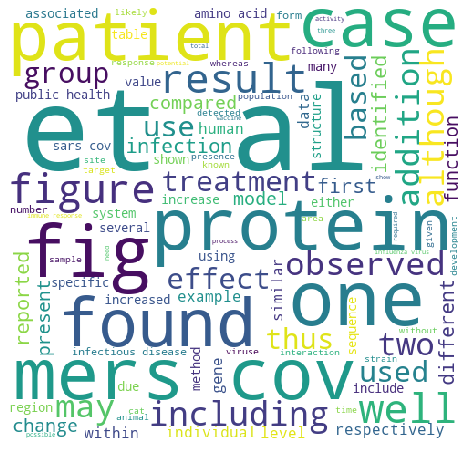

<Figure size 432x288 with 0 Axes>

In [88]:
wordcloud = WordCloud(max_words=100,mask=coronavirus, background_color="white",contour_color='firebrick').generate(text)

# Display the generated image:
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.show()
plt.savefig("wc1.png", dpi=900)

In [87]:
coronavirus = np.array(Image.open("coronavirus.png"))
coronavirus

array([[24, 24, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24],
       ...,
       [24, 24, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24]], dtype=uint8)

In [84]:
def transform_format(val):
    if val == 24:
        return 255
    else:
        return val

In [89]:
transformed_coronavirus = np.ndarray((coronavirus.shape[0],coronavirus.shape[1]), np.int32)

for i in range(len(coronavirus)):
    transformed_coronavirus[i] = list(map(transform_format, coronavirus[i]))

In [90]:
 covid_19['institutions'].head(1)

1137    NaN
Name: institutions, dtype: object

In [91]:
# nltk.download('brown')

In [92]:
blob = TextBlob(text)
# blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

# blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])
sentiment = blob.sentiment.polarity
print(sentiment)

0.06701958519247303


In [93]:
# blob.sentences[0]

In [94]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

covid_19['sentiment'] = covid_19['Body_text'].apply(sentiment_calc)

In [95]:
covid_19[['polarity', 'subjectivity']] = pd.DataFrame(covid_19['sentiment'].tolist(), index=covid_19.index) 
covid_19.sort_values(by=['polarity'], inplace=True, ascending=False)
covid_19.sort_values(by=['subjectivity'], inplace=True, ascending=False)

In [96]:
covid  = covid_19[:10]

[Text(0, 0, '7925057cfe0cb75ae6079879cb2d22d23e42dfa5'),
 Text(0, 0, 'f477cb32c61ef1a690f4b9afe74d38f8e147f39f'),
 Text(0, 0, '09cec865941962acf6060e72ef9c477c196c4c3b'),
 Text(0, 0, '2ea88246c467b56b00c2a792dbf3120299a624c7'),
 Text(0, 0, '544a170a18bae9bf44c531c2b0b4bdc5e85ea8f5'),
 Text(0, 0, 'e18773ecee762195cee18f1b3d83ef02f2db0dc9'),
 Text(0, 0, '0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c'),
 Text(0, 0, '2cf45a5a4224dbf38d537eace1f6d49327e3487d'),
 Text(0, 0, '8a6809df45d5f80a822d68d3c305f7640e10234a'),
 Text(0, 0, '58be092086c74c58e9067121a6ba4836468e7ec3')]

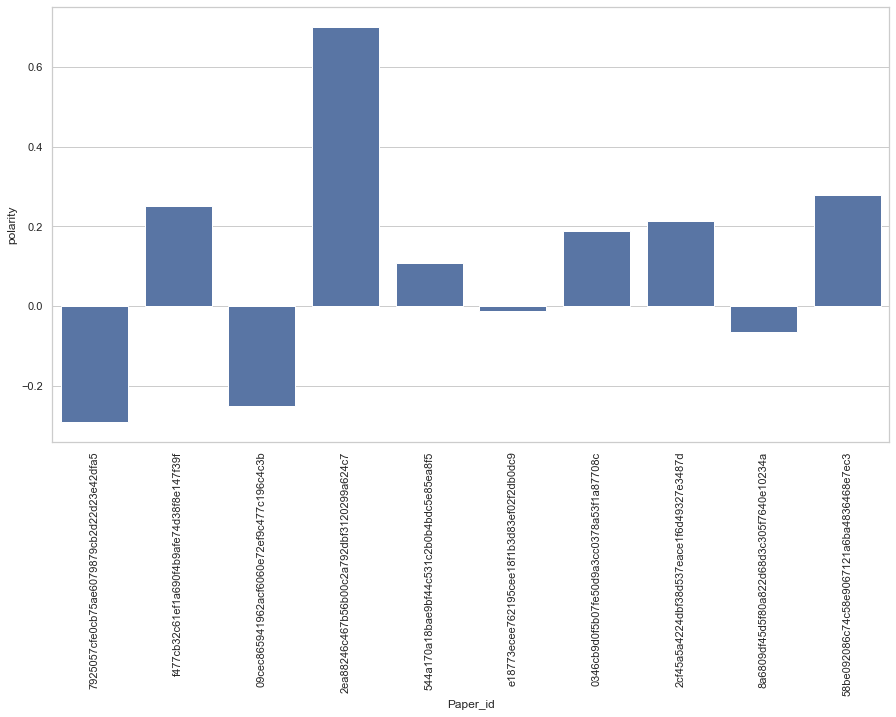

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.barplot(x="Paper_id", y= "polarity", data=covid,
            label="Total", color="b")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)

[Text(0, 0, '7925057cfe0cb75ae6079879cb2d22d23e42dfa5'),
 Text(0, 0, 'f477cb32c61ef1a690f4b9afe74d38f8e147f39f'),
 Text(0, 0, '09cec865941962acf6060e72ef9c477c196c4c3b'),
 Text(0, 0, '2ea88246c467b56b00c2a792dbf3120299a624c7'),
 Text(0, 0, '544a170a18bae9bf44c531c2b0b4bdc5e85ea8f5'),
 Text(0, 0, 'e18773ecee762195cee18f1b3d83ef02f2db0dc9'),
 Text(0, 0, '0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c'),
 Text(0, 0, '2cf45a5a4224dbf38d537eace1f6d49327e3487d'),
 Text(0, 0, '8a6809df45d5f80a822d68d3c305f7640e10234a'),
 Text(0, 0, '58be092086c74c58e9067121a6ba4836468e7ec3')]

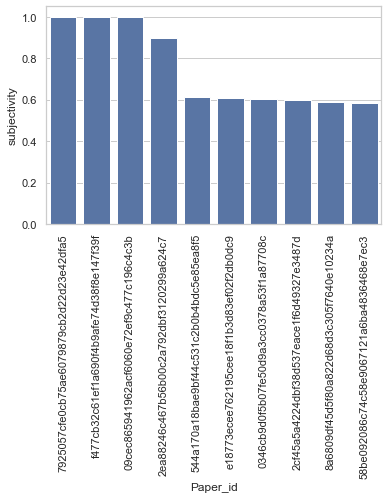

In [98]:
fig1 = sns.barplot(x="Paper_id", y= "subjectivity", data=covid,
            label="Total", color="b")
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)